# Stock Index Trend Analysis

Project created at the end of the *Python Data Toolkit* course by ProfessionAI.

The project focuses on two fundamental indices:
- **S&P 500**: which represents the US stock market.
- **EURO STOXX 50**: which describes the performance of the European stock market.

The goal is to study the performance of these indices over the last 10 years and draw valuable insights that can help investors make strategic decisions. Specifically:
- Calculation of percentage return (monthly and annual)
- Average daily return by day of the week
- Days with maximum and minimum percentage return
- Calculating the average daily volume


## How to run?
First of all add the files containing the data of S&P 500 and EURO STOXX 50, the files must be placed in the `./data` directory, it is also possible to place them in another path, in that case remember to pass the path of the directory containing the files as a parameter to the `dir` argument in the `read_csv_to_df()` function.

Then, you can run the following cells in order.

In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [10, 7]

In [3]:
def read_csv_to_df(filename: str, dir: str='./data/') -> pd.core.frame.DataFrame | None:
    """Read a csv file and return a `DataFrame` containing the data.
    If the file does not exist, an error message is printed and return None.

    :param filename: the name of the file to read
    :param dir: the directory where the file is located, default is ./data/
    :return: if the file exists, a `DataFrame` containing the data from the csv file
    else return None
    """
    filepath = os.path.join(dir, filename)

    try:
      df = pd.read_csv(filepath)
    except FileNotFoundError:
      df = None
      print(f'File "{filename}" does not exist, make sure you upload it to the path "{filepath}"')

    return df


sp500_df = read_csv_to_df(filename='sp500.csv')
euro50_df = read_csv_to_df(filename='euro50.csv')

if sp500_df is not None and euro50_df is not None:
    print('Data loaded successfully')


Data loaded successfully


In [4]:
# I sort the DataFrame by date to ensure that variation calculations
# (e.g., day-to-day returns) are computed in the correct chronological order.


# Remove timezone information to avoid warnings when converting to PeriodIndex
# (e.g., "Converting to PeriodArray/Index representation will drop timezone information").


def order_by_date(df: pd.core.frame.DataFrame) -> pd.core.frame.DataFrame:
    """Order the `DataFrame` passed as parameter by date.

    :param df: a `DataFrame` of stock indices, must have a `Date` column
    :return: a copy of the original `DataFrame` sorted by date
    """
    new_df = df.copy()
    new_df['Date'] = pd.to_datetime(new_df['Date'], utc=True)
    new_df['Date'] = new_df['Date'].dt.tz_localize(None)
    new_df.sort_values(by=['Date'], inplace=True)
    return new_df

sp500_df = order_by_date(sp500_df)
euro50_df = order_by_date(euro50_df)

# Calculation of percentage return

To calculate the **monthly** and **annual percentage returns** I used the following formulas:

$MonthlyReturnPercentage= \frac{ClosingLastDayMonth-ClosingFirstDayMonth}{ClosingFirstDayMonth} \times 100$


$AnnualReturnPercentage= \frac{ClosingLastDayYear-ClosingFirstDayYear}{ClosingFirstDayYear} \times 100$

In [38]:
# pandas >= 2.2: the column used for grouping is no longer automatically
# included in apply(). Explicitly including the Close column after groupby()
# and before apply() to preserve the current behavior and avoid DeprecationWarning.


def get_monthly_percentage_return(df: pd.core.frame.DataFrame) -> pd.core.series.Series:
    """Calculate the monthly percentage return of the `DataFrame` passed as
    parameter.

    :param df: a `DataFrame` of stock indices, must have a `Date` column
    :return: a `Series` of monthly percentage return
    """
    new_df = df.copy()
    new_df['YearMonth'] = new_df['Date'].dt.to_period('M')
    new_df = new_df.groupby('YearMonth')['Close',].apply(
    lambda x: (x.iloc[-1]['Close'] - x.iloc[0]['Close']) / x.iloc[0]['Close'] * 100)
    return new_df

def get_annual_percentage_return(df: pd.core.frame.DataFrame) -> pd.core.series.Series:
    """Calculate the annual percentage return of the `DataFrame` passed as
    parameter.

    :param df: a `DataFrame` of stock indices, must have a `Date` column
    :return: a `Series` of annual percentage return
    """
    new_df = df.copy()
    new_df['Year'] = new_df['Date'].dt.year
    new_df = new_df.groupby('Year')['Close',].apply(
    lambda x: (x.iloc[-1]['Close'] - x.iloc[0]['Close']) / x.iloc[0]['Close'] * 100)
    return new_df

In [40]:
monthly_returns_sp500 = get_monthly_percentage_return(sp500_df)
annual_returns_sp500 = get_annual_percentage_return(sp500_df)

print(f'Monthly Percentage Return S&P 500\n{monthly_returns_sp500.head()}\n')
print(f'Annual Percentage Return S&P 500\n{annual_returns_sp500.head()}')

['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
Monthly Percentage Return S&P 500
YearMonth
2014-04    2.231252
2014-05    2.309732
2014-06    1.948092
2014-07   -1.999667
2014-08    4.265017
Freq: M, dtype: float64

Annual Percentage Return S&P 500
Year
2014    13.265709
2015     1.288499
2016    13.585754
2017    20.781393
2018    -5.247162
dtype: float64


In [41]:
monthly_returns_euro50 = get_monthly_percentage_return(euro50_df)
annual_returns_euro50 = get_annual_percentage_return(euro50_df)

print(f'Monthly Percentage Return EURO STOXX 50\n{monthly_returns_euro50.head()}\n')
print(f'Annual Percentage Return EURO STOXX 50\n{annual_returns_euro50.head()}')

['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
Monthly Percentage Return EURO STOXX 50
YearMonth
2014-04    3.456871
2014-05    2.099198
2014-06    0.335917
2014-07   -4.204474
2014-08    3.406333
Freq: M, dtype: float64

Annual Percentage Return EURO STOXX 50
Year
2014     1.437155
2015     8.760431
2016     3.973761
2017     5.699511
2018   -14.910763
dtype: float64


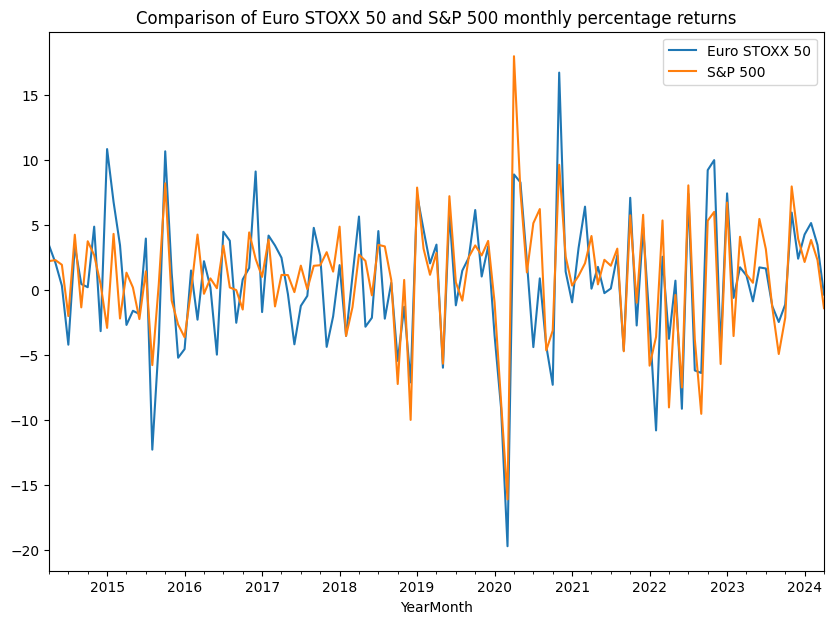

In [43]:
monthly_returns_euro50.plot(label='Euro STOXX 50')
monthly_returns_sp500.plot(label='S&P 500')
plt.title('Comparison of Euro STOXX 50 and S&P 500 monthly percentage returns')
plt.legend()
plt.show()

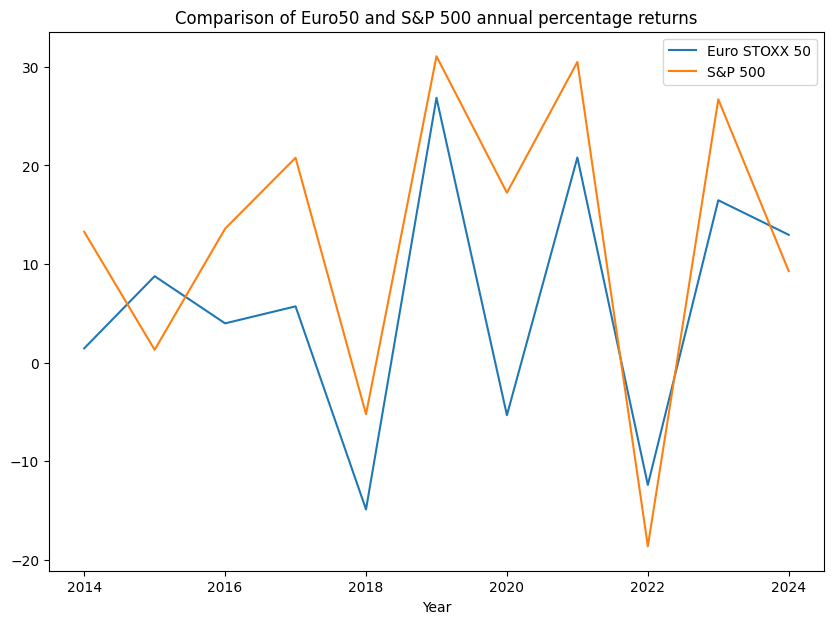

In [44]:
annual_returns_euro50.plot(label='Euro STOXX 50')
annual_returns_sp500.plot(label='S&P 500')
plt.title('Comparison of Euro50 and S&P 500 annual percentage returns')
plt.legend()
plt.show()

# Average daily return by day of the week

To calculate the **average daily return** I used the following formulas:

$DailyReturn= \frac{ClosingToday-ClosingYesterday}{ClosingYesterday} \times 100$

To perform this calculation, I found the `pct_change()` method useful for calculating the percentage change in the `Close` field for each row of the DataFrame, then multiplying the result by 100.

Then I grouped the values by `day_name`, and for each group I calculated the average of the `DailyReturn`.

In [45]:
def calcoulate_daily_return(df: pd.core.frame.DataFrame) -> pd.core.frame.DataFrame:
    """Calculate the daily return of the `DataFrame` passed as parameter.

    :param df: a `DataFrame` of stock indices, must have a `Close` column
    :return: a copy of the original `DataFrame` with a new column `DailyReturn`
    """
    new_df = df.copy()
    new_df['DailyReturn'] = new_df['Close'].pct_change() * 100
    return new_df

def get_avg_daily_return(df: pd.core.frame.DataFrame) -> pd.core.series.Series:
    """Calculate the average daily return of the `DataFrame` passed as parameter.

    :param df: a `DataFrame` of stock indices, must have a `DailyReturn` column
    :return: a `Series` of average daily return
    """
    new_df = df.copy()
    new_df['Day'] = new_df['Date'].dt.day_name()
    new_df = new_df.groupby('Day')['DailyReturn'].mean()
    return new_df

In [46]:
daily_return_sp500_df = calcoulate_daily_return(sp500_df)
avg_daily_return_sp500 = get_avg_daily_return(daily_return_sp500_df)
print(f'Average daily return S&P 500\n{avg_daily_return_sp500}\n')

daily_return_euro50_df = calcoulate_daily_return(euro50_df)
avg_daily_return_euro50 = get_avg_daily_return(daily_return_euro50_df)
print(f'Average daily return EURO STOXX 50\n{avg_daily_return_euro50}')

Average daily return S&P 500
Day
Friday       0.051963
Monday       0.048327
Thursday     0.038828
Tuesday      0.051571
Wednesday    0.078946
Name: DailyReturn, dtype: float64

Average daily return EURO STOXX 50
Day
Monday       0.108546
Sunday      -0.047185
Thursday     0.016218
Tuesday      0.098675
Wednesday   -0.047067
Name: DailyReturn, dtype: float64


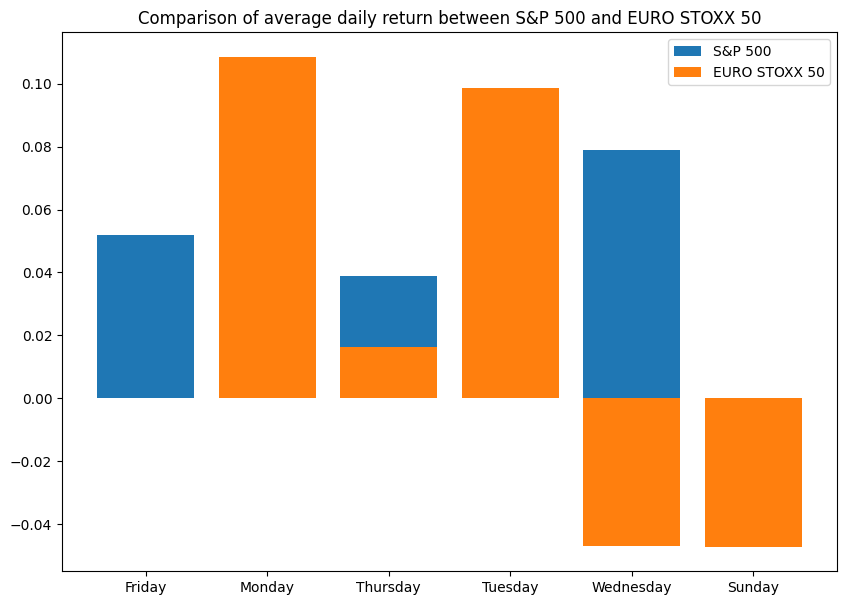

In [47]:
def plot_comparison_avg_daily_return(avg_daily_return_sp500: pd.core.series.Series,
                                     avg_daily_return_euro50: pd.core.series.Series):
  """Plot the comparison of the average daily return between the two indices.

  :param avg_daily_return_sp500: a `Series` of average daily return of S&P 500
  :param avg_daily_return_euro50: a `Series` of average daily return of EURO STOXX 50
  """
  plt.bar(avg_daily_return_sp500.index, avg_daily_return_sp500.values)
  plt.bar(avg_daily_return_euro50.index, avg_daily_return_euro50.values)
  plt.legend(['S&P 500', 'EURO STOXX 50'])
  plt.title('Comparison of average daily return between S&P 500 and EURO STOXX 50')
  plt.show()

plot_comparison_avg_daily_return(avg_daily_return_sp500, avg_daily_return_euro50)

# Days with maximum and minimum return

Here, I calculated the days with maximum and minimum daily returns by finding the dates with the extreme values ​​from the DataFrame with the **daily returns** previously calculated.

I transformed the `Date` column from `datetime` to `date` to display the dates in a clearer and more organized format when I print the results in the output.

In [48]:
def from_datetime_to_date(df: pd.core.frame.DataFrame) -> pd.core.frame.DataFrame:
    """Convert the `Date` column of the `DataFrame` passed as parameter from
    `datetime` to `date`.

    :param df: a `DataFrame` of stock indices, must have a `Date` column
    :return: a copy of the original `DataFrame` with a new column `Date` converted
    """
    new_df = df.copy()
    new_df['Date'] = new_df['Date'].dt.date
    return new_df

daily_return_sp500_df = from_datetime_to_date(daily_return_sp500_df)
daily_return_euro50_df = from_datetime_to_date(daily_return_euro50_df)

In [49]:
def get_days_with_max_return(df: pd.core.frame.DataFrame) -> pd.core.series.Series:
    """Get the day with the maximum return of the `DataFrame`
    passed as parameter.

    :param df: a `DataFrame` of stock indices, must have a `DailyReturn` column
    :return: a `Series` of the day with the maximum return
    """
    new_df = df.copy()
    new_df = new_df[new_df['DailyReturn'] == new_df['DailyReturn'].max()]
    return new_df['Date'].values

def get_days_with_min_return(df: pd.core.frame.DataFrame) -> pd.core.series.Series:
    """Get the day with the minimum return of the `DataFrame`
    passed as parameter.

    :param df: a `DataFrame` of stock indices, must have a `DailyReturn` column
    :return: a `Series` of the day with the minimum return
    """
    new_df = df.copy()
    new_df = new_df[new_df['DailyReturn'] == new_df['DailyReturn'].min()]
    return new_df['Date'].values


max_daily_return_sp500 = get_days_with_max_return(daily_return_sp500_df)
min_daily_return_sp500 = get_days_with_min_return(daily_return_sp500_df)
min_daily_return_euro50 = get_days_with_min_return(daily_return_euro50_df)
max_daily_return_euro50 = get_days_with_max_return(daily_return_euro50_df)

In [50]:
def format_dates_array(dates) -> list:
    """Format the dates array passed as parameter.

    :param dates: a numpy array of dates
    :return: a list of formatted dates
    """
    formatted_dates = [d.strftime('%Y-%m-%d') for d in dates]
    return formatted_dates

def print_output_message(df_name: str, days_min: list, days_max: list):
    """Print the output message.

    :param df_name: the name of the DataFrame
    :param days_min: a list of days with the minimum daily return
    :param days_max: a list of days with the maximum daily return
    """
    formatted_days_min = format_dates_array(days_min)
    formatted_days_max = format_dates_array(days_max)
    print(f"""In {df_name} indices the days with the maximum daily return are
    {formatted_days_max} while those with the minimum are {formatted_days_min}\n""")


print_output_message('S&P 500', min_daily_return_sp500, max_daily_return_sp500)
print_output_message('EURO STOXX 50', min_daily_return_euro50, max_daily_return_euro50)

In S&P 500 indices the days with the maximum daily return are
    ['2020-03-24'] while those with the minimum are ['2020-03-16']

In EURO STOXX 50 indices the days with the maximum daily return are
    ['2020-03-23'] while those with the minimum are ['2020-03-11']




# Calculation of the average daily volume

To perform this calculation I grouped the data by `day_name`, then for each group I calculated the average of the values ​​in the `Volume` column.

In [51]:
def get_avg_daily_volume(df: pd.core.frame.DataFrame) -> pd.core.series.Series:
    """Calculate the average daily volume of the `DataFrame`
    passed as parameter.

    :param df: a `DataFrame` of stock indices, must have a `Volume` column
    :return: a `Series` of average daily volume
    """
    new_df = df.copy()
    return new_df.groupby(new_df['Date'].dt.day_name())['Volume'].mean()


avg_daily_volume_sp500 = get_avg_daily_volume(sp500_df)
avg_daily_volume_euro50 = get_avg_daily_volume(euro50_df)

print(f'Average daily volume S&P 500\n{avg_daily_volume_sp500}\n')
print(f'Average daily volume EURO STOXX 50\n{avg_daily_volume_euro50}')

Average daily volume S&P 500
Date
Friday       1.014338e+08
Monday       8.355502e+07
Thursday     9.324517e+07
Tuesday      8.661714e+07
Wednesday    9.119019e+07
Name: Volume, dtype: float64

Average daily volume EURO STOXX 50
Date
Monday       4.074812e+07
Sunday       3.709843e+07
Thursday     4.632838e+07
Tuesday      4.121252e+07
Wednesday    4.418427e+07
Name: Volume, dtype: float64


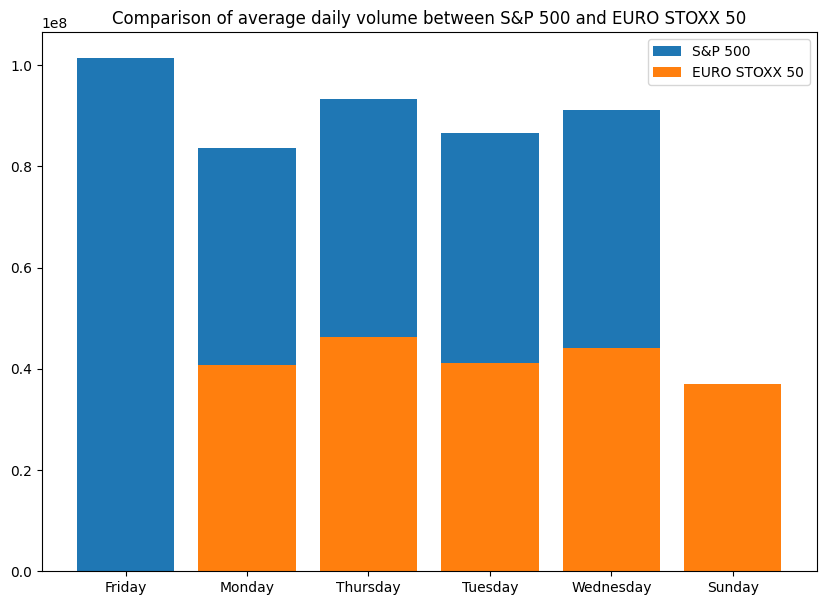

In [52]:
def plot_comparison_avg_daily_volume(avg_daily_volume_sp500: pd.core.series.Series,
                                     avg_daily_volume_euro50: pd.core.series.Series):
  """Plot the comparison of the average daily volume
  between the two indices.

  :param avg_daily_volume_sp500: a `Series` of average daily volume of S&P 500
  :param avg_daily_volume_euro50: a `Series` of average daily volume of EURO STOXX
  """
  plt.bar(avg_daily_volume_sp500.index, avg_daily_volume_sp500)
  plt.bar(avg_daily_volume_euro50.index, avg_daily_volume_euro50)
  plt.legend(['S&P 500', 'EURO STOXX 50'])
  plt.title('Comparison of average daily volume between S&P 500 and EURO STOXX 50')
  plt.show()

plot_comparison_avg_daily_volume(avg_daily_volume_sp500, avg_daily_volume_euro50)